<a href="https://colab.research.google.com/github/ProfessorAbraham/solar-challenge-week1/blob/eda-benin/notebooks/benin_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Replace with your actual GitHub repo
!git clone https://github.com/professorAbraham/solar-challenge-week1.git
%cd solar-challenge-week1


Cloning into 'solar-challenge-week1'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 29 (delta 5), reused 25 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 4.85 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/solar-challenge-week1


In [2]:
!git checkout -b eda-benin

Switched to a new branch 'eda-benin'


In [3]:
!git commit -m "feat: EDA on Benin dataset - summary and cleaning"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@9f05991cb9a5.(none)')


In [10]:
!git commit -m "feat: EDA on Benin dataset - summary and cleaning"

[eda-benin f8923b3] feat: EDA on Benin dataset - summary and cleaning
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 notebooks/benin_eda.ipynb


In [11]:
!git push -u origin eda-benin

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 345 bytes | 345.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: This repository moved. Please use the new location:
remote:   https://github.com/ProfessorAbraham/solar-challenge-week1.git
remote: 
remote: Create a pull request for 'eda-benin' on GitHub by visiting:
remote:      https://github.com/ProfessorAbraham/solar-challenge-week1/pull/new/eda-benin
remote: 
To https://github.com/professorAbraham/solar-challenge-week1.git
 * [new branch]      eda-benin -> eda-benin
Branch 'eda-benin' set up to track remote branch 'eda-benin' from 'origin'.


In [9]:
!git add notebooks/benin_eda.ipynb

In [12]:
!mkdir -p data
!mv benin.csv data/


mv: cannot stat 'benin.csv': No such file or directory


In [13]:
import pandas as pd
df = pd.read_csv("/content/solar-challenge-week1/data/benin-malanville.csv")

In [14]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [15]:
df.describe()
df.isna().sum() / len(df) * 100

,0
Timestamp,0.0
GHI,0.0
DNI,0.0
DHI,0.0
ModA,0.0
ModB,0.0
Tamb,0.0
RH,0.0
WS,0.0
WSgust,0.0


In [16]:
from scipy.stats import zscore

z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[z_cols].apply(zscore)
outliers = (df_z.abs() > 3).sum()
outliers

,0
GHI,89
DNI,0
DHI,3738
ModA,27
ModB,63
WS,3109
WSgust,3500


In [17]:
df_cleaned = df.copy()
for col in z_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

In [18]:
df_cleaned.to_csv("benin_clean.csv", index=False)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


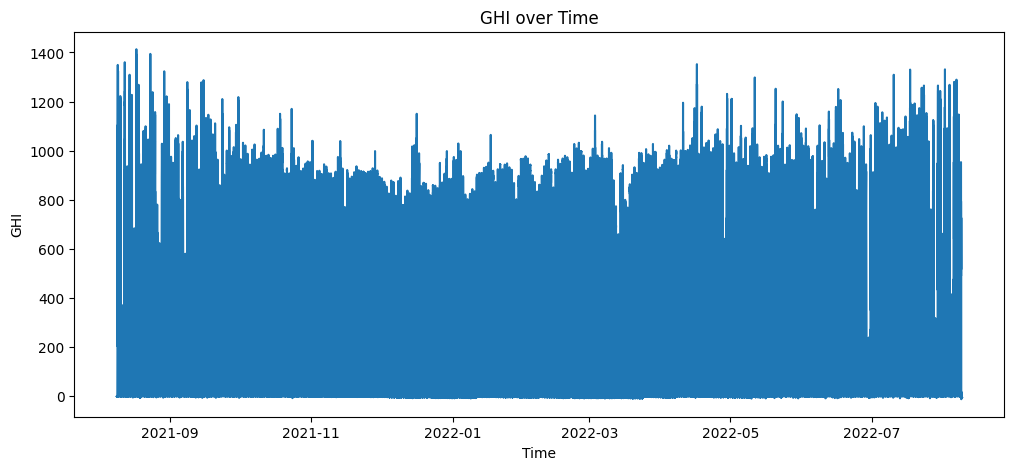

In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # if not already datetime
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['GHI'])
plt.title('GHI over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.show()

Benin is finished